In [1]:
import DAN_code.data_processing as data_proc

from tensorflow.keras.datasets import mnist, fashion_mnist

import DAN_code.umap_utils as umap_utils

2025-03-14 15:30:38.385745: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-03-14 15:30:38.454621: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-03-14 15:30:57.331963: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [ ]:
dataset = mnist

x_train, y_train, x_test, y_test = data_proc.prepare_flat_data(dataset, normalize_data = True, softening = 0)
#x_test = x_test[400:2300:5]
x_train = x_train[:1111]

beta = 40.
name = "DAN"

file_suffix = "without_splitting"

overlaps = umap_utils.calculate_overlaps(x_train, beta, name, file_suffix)

seed = 37

umap_model = umap_utils.train_umap(overlaps, seed)

umap_utils.umap_embedding(overlaps, umap_model, beta, name, file_suffix)
umap_utils.plot_umap(beta, name, file_suffix)

file_suffix = "with_splitting"

overlaps = umap_utils.calculate_overlaps(x_train, beta, name, file_suffix)

umap_utils.umap_embedding(overlaps, umap_model, beta, name, file_suffix)
umap_utils.plot_umap(beta, name, file_suffix)

/home/rtheriault/.conda/envs/umap_env/lib/python3.8/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


UMAP(low_memory=False, n_jobs=1, n_neighbors=1000, random_state=37, verbose=True)
Fri Mar 14 15:33:44 2025 Construct fuzzy simplicial set
Fri Mar 14 15:33:44 2025 Finding Nearest Neighbors
Fri Mar 14 15:33:44 2025 Building RP forest with 23 trees
Fri Mar 14 15:33:58 2025 NN descent for 17 iterations
	 1  /  17
	 2  /  17
	 3  /  17
	 4  /  17
	 5  /  17


/home/rtheriault/Dense_Associative_Network/DAN_code/umap_utils.py:30: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  overlaps = np.linalg.lstsq(w.T, x_test.T)[0]


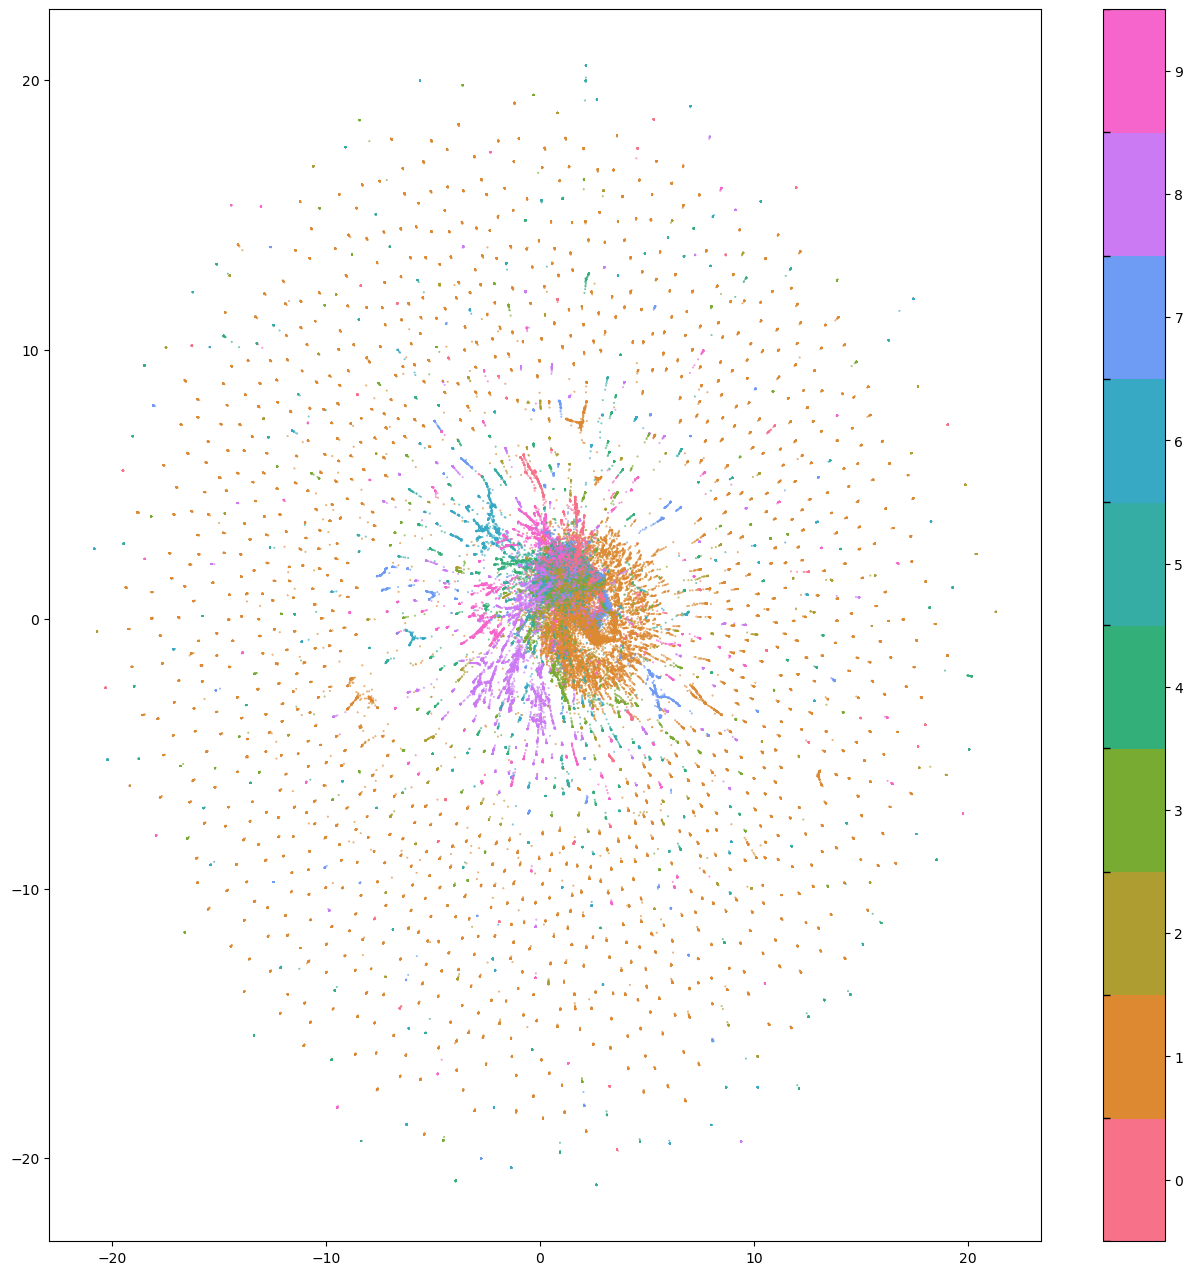

/home/rtheriault/Dense_Associative_Network/DAN_code/umap_utils.py:30: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  overlaps = np.linalg.lstsq(w.T, x_test.T)[0]


In [ ]:
file_suffix = "without_splitting"

overlaps = umap_utils.calculate_overlaps(x_test[400:2300:5], beta, name, file_suffix)

umap_utils.umap_embedding(overlaps, umap_model, beta, name, file_suffix)
umap_utils.plot_umap(beta, name, file_suffix)

file_suffix = "with_splitting"

overlaps = umap_utils.calculate_overlaps(x_test[400:2300:5], beta, name, file_suffix)

umap_utils.umap_embedding(overlaps, umap_model, beta, name, file_suffix)
umap_utils.plot_umap(beta, name, file_suffix)